In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools as it

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [181]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)



### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [182]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [183]:
x = df[['Ground Temperature']].values
x

array([[88.6],
       [71.6],
       [93.3],
       [84.3],
       [80.6],
       [75.2],
       [69.7],
       [71.6],
       [69.4],
       [83.3],
       [79.6],
       [82.6],
       [80.6],
       [83.5],
       [76.3]])

In [184]:
y = df['Chirps/Second'].values
y

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [185]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [186]:
print('intercept :',regressor.intercept_)
print('coefficient :',regressor.coef_)

intercept : 0.45931464523595267
coefficient : [0.20299973]


In [187]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


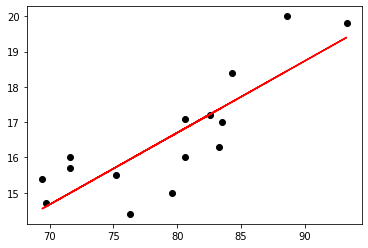

In [188]:
plt.scatter(x, y, color='black')
plt.plot(x, regressor.predict(x), color='red')

In [189]:
print('R-squared: ', regressor.score(x, y))

R-squared:  0.6922946529146998


**The R-Squared value is less the 0.8.Therefore it is not a good fit for this data.**

In [190]:
regressor.predict([[95]])


array([19.74428913])

**If the ground temperature reached 95, then the approximate rate to expect the crickets to be chirping is 19.7443**

In [191]:
(18 - regressor.intercept_) / regressor.coef_

array([86.40743135])

**With a given chirps at 18. The expected ground temperature will be 86.41**


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [192]:
df = pd.read_fwf("brain_body.txt")

In [193]:
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [194]:
x = df[['Brain']].values
x

array([[3.385e+00],
       [4.800e-01],
       [1.350e+00],
       [4.650e+02],
       [3.633e+01],
       [2.766e+01],
       [1.483e+01],
       [1.040e+00],
       [4.190e+00],
       [4.250e-01],
       [1.010e-01],
       [9.200e-01],
       [1.000e+00],
       [5.000e-03],
       [6.000e-02],
       [3.500e+00],
       [2.000e+00],
       [1.700e+00],
       [2.547e+03],
       [2.300e-02],
       [1.871e+02],
       [5.210e+02],
       [7.850e-01],
       [1.000e+01],
       [3.300e+00],
       [2.000e-01],
       [1.410e+00],
       [5.290e+02],
       [2.070e+02],
       [8.500e+01],
       [7.500e-01],
       [6.200e+01],
       [6.654e+03],
       [3.500e+00],
       [6.800e+00],
       [3.500e+01],
       [4.050e+00],
       [1.200e-01],
       [2.300e-02],
       [1.000e-02],
       [1.400e+00],
       [2.500e+02],
       [2.500e+00],
       [5.550e+01],
       [1.000e+02],
       [5.216e+01],
       [1.055e+01],
       [5.500e-01],
       [6.000e+01],
       [3.600e+00],


In [195]:
y = df['Body'].values
y

array([4.450e+01, 1.550e+01, 8.100e+00, 4.230e+02, 1.195e+02, 1.150e+02,
       9.820e+01, 5.500e+00, 5.800e+01, 6.400e+00, 4.000e+00, 5.700e+00,
       6.600e+00, 1.400e-01, 1.000e+00, 1.080e+01, 1.230e+01, 6.300e+00,
       4.603e+03, 3.000e-01, 4.190e+02, 6.550e+02, 3.500e+00, 1.150e+02,
       2.560e+01, 5.000e+00, 1.750e+01, 6.800e+02, 4.060e+02, 3.250e+02,
       1.230e+01, 1.320e+03, 5.712e+03, 3.900e+00, 1.790e+02, 5.600e+01,
       1.700e+01, 1.000e+00, 4.000e-01, 2.500e-01, 1.250e+01, 4.900e+02,
       1.210e+01, 1.750e+02, 1.570e+02, 4.400e+02, 1.795e+02, 2.400e+00,
       8.100e+01, 2.100e+01, 3.920e+01, 1.900e+00, 1.200e+00, 3.000e+00,
       3.300e-01, 1.800e+02, 2.500e+01, 1.690e+02, 2.600e+00, 1.140e+01,
       2.500e+00, 5.040e+01])

In [196]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [197]:
print('intercept :',regressor.intercept_)
print('coefficient :',regressor.coef_)

intercept : 91.00439620740687
coefficient : [0.96649637]


In [198]:
print('Linear Regression is y = {:.4f} * x + {:.4f}'.format(regressor.coef_[0],regressor.intercept_))

Linear Regression is y = 0.9665 * x + 91.0044


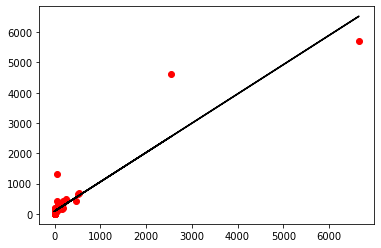

In [199]:
plt.scatter(x,y,color='Red')
plt.plot(x,regressor.predict(x),color = 'black')

In [200]:
print('R-Squared value:',regressor.score(x,y))

R-Squared value: 0.8726620843043331


**The value of R-squared is 0.872. Therefore The Equation is a Good fit for the Data**

# Assignment7

## Salary Discrimination




The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [201]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [202]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [203]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary

In [204]:
y

0     36350
1     35350
2     28200
3     26775
4     33696
5     28516
6     24900
7     31909
8     31850
9     32850
10    27025
11    24750
12    28200
13    23712
14    25748
15    29342
16    31114
17    24742
18    22906
19    24450
20    19175
21    20525
22    27959
23    38045
24    24832
25    25400
26    24800
27    25500
28    26182
29    23725
30    21600
31    23300
32    23713
33    20690
34    22450
35    20850
36    18304
37    17095
38    16700
39    17600
40    18075
41    18000
42    20999
43    17250
44    16500
45    16094
46    16150
47    15350
48    16244
49    16686
50    15000
51    20300
Name: Salary, dtype: int64

In [205]:
linreg = linear_model.LinearRegression()
linreg.fit(x, y)

LinearRegression()

In [206]:
print('Features & Coefficients')
print(list(zip(feature, linreg.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [207]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']


In [208]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [209]:
lin_reg_eq_print(salary_discrim_cols, df)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [210]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [211]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, df)))

R^2 score for equation using all columns: 0.8547180674410969


In [212]:
def get_combos(cols):
  return[it.combinations(cols, n+1) for n in range(len(cols))]


In [213]:
combos = get_combos(salary_discrim_cols)


In [214]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [215]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485598, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443395, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

**The selection of column with best R-Squared is ( 'Sex','Rank','Year','YSdeg') with a value of 0.8490366192262851**

**As the value of SEX is almost closer to zero (0.06389892583288004).It is found that SEX has no direct influence on the salary**

In [216]:
num_by_sex = df.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


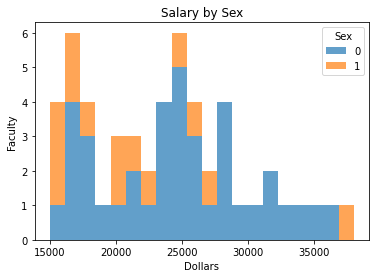

In [217]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

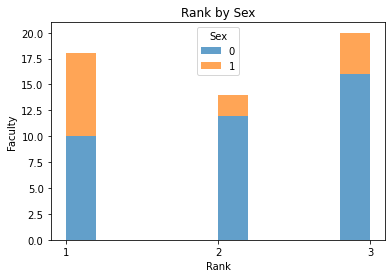

In [218]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

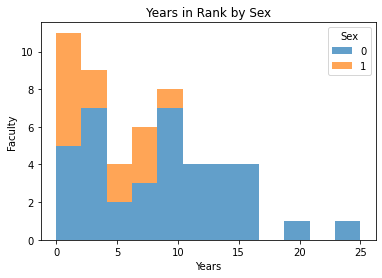

In [219]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

**SEX has a value very close to zero(0.06389892583288004). So there is no Salary Discrimination based on SEX**